<h2> Potential Analysis and Recommendations </h2>

1. Infrastructure Gap Analysis: 
- Identify schools with inadequate infrastructure such as lack of classrooms, sanitation facilities.
- Prioritize investements. Recommend allocating resources to upgrade or build new facilities in these areas.
- Visualize: Create maps/charts to highlight the geographic distributionof schools with infrastructure needs.

2. Student-Teacher Ratio Analysis:
- Calculate student-teacher ratios. Identify areas where the ratio is significantly higher to improve the quality of education.Recommend teacher recruitment.

3. Demographic Analysis:
- Identify areas with high population growth. Analyze the Population Census Data to identify areas with high population growth rates.
- Anticipate future needs. recommend proactive measures to accommodate future increases in school enrollment.

4. Equity Analysis:
- Identify disparities in education access. Analyze the data to identify any disparities in access to education based on factors like gender, socioeconomic status or geographic location.
- Recommend targeted interventions. Suggest initiatives to address these disparities such as scholarships, mentorship programs, or specialized educational programs.

In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('kenya_primary_schools.csv')

<h2> Understanding the Data </h2>

In [3]:
# The first 5 rows of the dataset
df.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
0,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,2.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,EASTERN,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [4]:
# Shape of the entire Kenyan primary schools in Kenya
df.shape

(31230, 38)

In [5]:
# Checking for null values
df.isna().sum()

X              0
Y              0
FID            0
Name_of_Sc     1
Level_         1
Status         1
SchSponsor     1
Type1          1
Type2          1
Type3          1
PupilTeach     1
ClassrmRat     1
ToiletRati     1
No_Classrm     1
BoysToilet     1
GirlsToilet    1
TeachersTo     1
TotalToile     1
TotalBoys      1
TotalGirls     1
TotalEnrol     1
GO_KTSC_M      1
GOK_TSC_F      1
authorityM     1
authorityF     1
PTA_BOG_M      1
PTA_BOG_F      1
OthersM        1
OthersF        1
NoTeaching     1
NonTeachin     1
Province       1
District       1
Division       1
Location       1
Costituenc     1
Latitude       1
Longitude      1
dtype: int64

In [6]:
# Dropping null values
df=df.dropna()

In [7]:
df.isna().sum()

X              0
Y              0
FID            0
Name_of_Sc     0
Level_         0
Status         0
SchSponsor     0
Type1          0
Type2          0
Type3          0
PupilTeach     0
ClassrmRat     0
ToiletRati     0
No_Classrm     0
BoysToilet     0
GirlsToilet    0
TeachersTo     0
TotalToile     0
TotalBoys      0
TotalGirls     0
TotalEnrol     0
GO_KTSC_M      0
GOK_TSC_F      0
authorityM     0
authorityF     0
PTA_BOG_M      0
PTA_BOG_F      0
OthersM        0
OthersF        0
NoTeaching     0
NonTeachin     0
Province       0
District       0
Division       0
Location       0
Costituenc     0
Latitude       0
Longitude      0
dtype: int64

In [8]:
# Shape of columns
df.shape

(31229, 38)

In [9]:
# Summary statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31229 entries, 0 to 31229
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            31229 non-null  float64
 1   Y            31229 non-null  float64
 2   FID          31229 non-null  int64  
 3   Name_of_Sc   31229 non-null  object 
 4   Level_       31229 non-null  object 
 5   Status       31229 non-null  object 
 6   SchSponsor   31229 non-null  object 
 7   Type1        31229 non-null  object 
 8   Type2        31229 non-null  object 
 9   Type3        31229 non-null  object 
 10  PupilTeach   31229 non-null  float64
 11  ClassrmRat   31229 non-null  float64
 12  ToiletRati   31229 non-null  float64
 13  No_Classrm   31229 non-null  float64
 14  BoysToilet   31229 non-null  float64
 15  GirlsToilet  31229 non-null  float64
 16  TeachersTo   31229 non-null  float64
 17  TotalToile   31229 non-null  float64
 18  TotalBoys    31229 non-null  float64
 19  TotalGirl

In [10]:
# We only want to focus on Nairobi data
df = df[df['Province']== 'NAIROBI']

In [11]:
# Data Cleaning
df.columns = df.columns.str.strip().str.lower()  # Normalize column names
df.rename(columns={
    'name_of_sc': 'school_name',
    'no_classrm': 'classrooms',
    'boystoilet': 'boys_toilet',
    'girlstoilet': 'girls_toilet',
    'teachers_to': 'teachers_total',
    'totaltoile': 'total_toilets',
    'totalboys': 'total_boys',
    'totalgirls': 'total_girls',
    'totalenrol': 'total_enrollment',
    'classrmrat': 'classroom_ratio',
    'toiletrati': 'toilet_ratio'
}, inplace=True)

In [12]:
df.columns

Index(['x', 'y', 'fid', 'school_name', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classroom_ratio',
       'toilet_ratio', 'classrooms', 'boys_toilet', 'girls_toilet',
       'teachersto', 'total_toilets', 'total_boys', 'total_girls',
       'total_enrollment', 'go_ktsc_m', 'gok_tsc_f', 'authoritym',
       'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm', 'othersf',
       'noteaching', 'nonteachin', 'province', 'district', 'division',
       'location', 'costituenc', 'latitude', 'longitude'],
      dtype='object')

In [13]:
# Finding rows with zero total enrollment
zero_rows=df[(df['total_enrollment']==0)]
len(zero_rows)

211

In [14]:
df.shape

(1241, 38)

In [15]:
# Dropping the zero rows on schools with zero enrollment
indices_to_drop=zero_rows.index
df=df.drop(indices_to_drop)

In [16]:
df.shape

(1030, 38)

In [19]:
df['total_toilets'] = df['boys_toilet'] + df['girls_toilet']

In [18]:
# First five rows of Nairobi Primary Schools Dataset
df.head()

,x,y,fid,school_name,level_,status,schsponsor,type1,type2,type3,...,othersf,noteaching,nonteachin,province,district,division,location,costituenc,latitude,longitude
587,36.85,-1.26,10588,BRIGHT ACADEMY PR,PRIMARY SCHOOL,PRIVATE,NGO/CBO,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,1.0,NAIROBI,NAIROBI,STAREHE,MATHARE,STAREHE,-1.26,36.85
20270,36.75,-1.28,21271,GATINA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,...,0.0,3.0,1.0,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.28,36.75
20276,36.76,-1.27,21277,MUGWAM EDUC CENTRE PRI SCHOOL,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,...,2.0,1.0,2.0,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.27,36.76
20282,36.76,-1.27,21283,MUGWAM EDUCATION CENTRE (PRI) SCH,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,...,2.0,1.0,2.0,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.27,36.76
20287,36.76,-1.27,21288,MWANGAZA UNITED PRIMARY,PRIMARY SCHOOL,PRIVATE,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,2.0,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.27,36.76


In [20]:
df.describe()

,x,y,fid,pupilteach,classroom_ratio,toilet_ratio,classrooms,boys_toilet,girls_toilet,teachersto,...,authoritym,authorityf,pta_bog_m,pta_bog_f,othersm,othersf,noteaching,nonteachin,latitude,longitude
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,...,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,36.842107,-1.267563,22309.565049,21.717864,23.710097,33.422621,10.648544,4.383495,5.312621,2.118447,...,0.043689,0.277670,1.200971,1.571845,2.233981,3.161165,2.288350,2.345631,-1.267563,36.842107
std,0.067718,0.034237,544.931355,22.533030,18.431506,35.642145,8.204077,4.782898,6.192360,2.204234,...,0.359562,1.361909,2.565640,2.963691,3.992292,5.348610,3.901528,3.094394,0.034237,0.067718
min,36.680000,-1.370000,10588.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.370000,36.680000
25%,36.780000,-1.290000,22055.250000,9.500000,10.500000,10.700000,5.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.290000,36.780000
50%,36.860000,-1.270000,22343.500000,16.950000,19.700000,23.950000,8.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-1.270000,36.860000
75%,36.890000,-1.250000,22661.750000,28.200000,32.150000,45.500000,15.000000,6.000000,8.000000,3.000000,...,0.000000,0.000000,1.000000,2.000000,4.000000,5.000000,3.000000,3.000000,-1.250000,36.890000
max,37.060000,-1.170000,22995.000000,289.000000,179.000000,440.500000,56.000000,26.000000,38.000000,26.000000,...,6.000000,27.000000,21.000000,27.000000,51.000000,46.000000,41.000000,35.000000,-1.170000,37.060000


For our Summary Statistics:
- The pupil teacher ratio has an average of 21. That means 1 teacher is to 21 pupils. Where the student-teacher threshold in Kenya is 1:40, so this is not such a major problem.
- The mean for the classroom_ratio is 23 and the classroom threshold in Kenya is 40.
- Them mean for the toilet_ration is 1:33 whereas it needs to be 1:25.

In [20]:
df.columns

Index(['x', 'y', 'fid', 'school_name', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classroom_ratio',
       'toilet_ratio', 'classrooms', 'boys_toilet', 'girls_toilet',
       'teachersto', 'total_toilets', 'total_boys', 'total_girls',
       'total_enrollment', 'go_ktsc_m', 'gok_tsc_f', 'authoritym',
       'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm', 'othersf',
       'noteaching', 'nonteachin', 'province', 'district', 'division',
       'location', 'costituenc', 'latitude', 'longitude'],
      dtype='object')

<h2> Geographic & Population Analysis </h2>

In [72]:
kenyan_population = pd.read_excel('population by subcounty.xlsx')

In [76]:
kenyan_population

,Unnamed: 0,Male,Female
0,Nairobi City,2192452,2204376
1,Dagoretti,217651,216526
2,Embakasi,492476,496270
3,Kamukunji,136670,131599
4,Kasarani,381234,399385
5,Kibra,94199,91569
6,Lang'ata,96698,100774
7,Makadara,96369,93157
8,Mathare,106522,100028
9,Njiru,307642,318809


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'KASARANI'),
  Text(1, 0, 'EMBAKASI'),
  Text(2, 0, 'KIBERA'),
  Text(3, 0, 'DAGORETTI'),
  Text(4, 0, 'WESTLANDS'),
  Text(5, 0, 'STAREHE'),
  Text(6, 0, 'MAKADARA'),
  Text(7, 0, 'PUMWANI')])

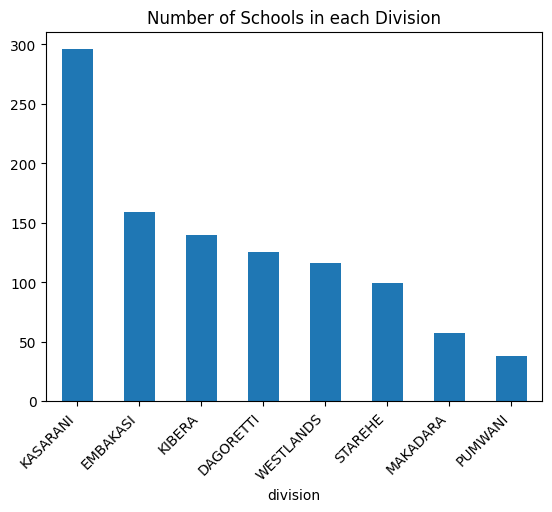

In [21]:
# Top Division Schools in Kenya
df['division'].value_counts().plot(kind='bar', title='Number of Schools in each Division')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'KARIOBANGI'),
  Text(1, 0, 'KASARANI'),
  Text(2, 0, 'RUARAKA'),
  Text(3, 0, 'HURUMA'),
  Text(4, 0, 'GITHURAI'),
  Text(5, 0, 'KAYOLE'),
  Text(6, 0, 'RIRUTA'),
  Text(7, 0, 'KANGEMI'),
  Text(8, 0, 'KAWANGWARE'),
  Text(9, 0, 'KIBERA')])

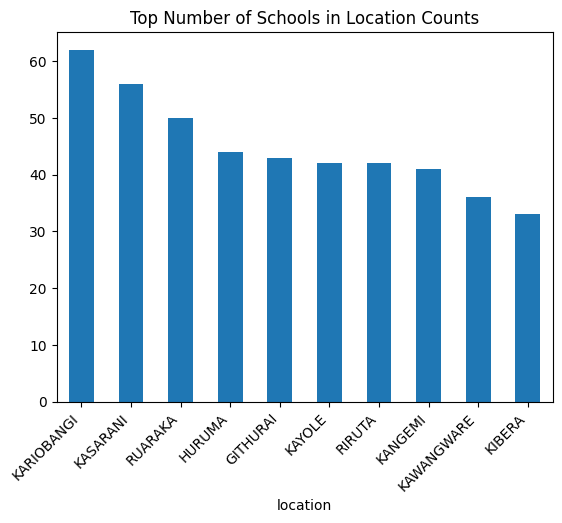

In [22]:
df['location'].value_counts().head(10).plot(kind='bar')
plt.title('Top Number of Schools in Location Counts')
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Counts of Schools in Nairobi Constituencies')

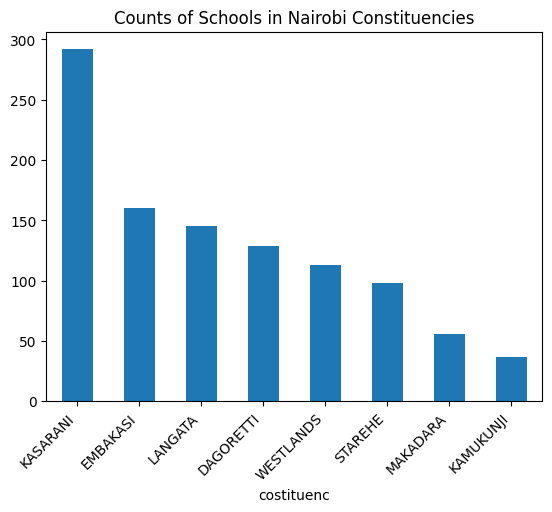

In [23]:
df['costituenc'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Counts of Schools in Nairobi Constituencies')

In [24]:
df['location'].value_counts().tail(10)

location
SOUTH B       1
MUKURU        1
SARANGOMBE    1
KIATATHI      1
FUATANYAYO    1
DOONHOLM      1
UTAWALA       1
PUMWANI       1
OLYMPIC       1
UTALI         1
Name: count, dtype: int64

In [25]:
df['location'].value_counts().head(10)

location
KARIOBANGI    62
KASARANI      56
RUARAKA       50
HURUMA        44
GITHURAI      43
KAYOLE        42
RIRUTA        42
KANGEMI       41
KAWANGWARE    36
KIBERA        33
Name: count, dtype: int64

<h2> School Characteristics </h2>

<Axes: title={'center': 'Status of Primary Schools in Kenya'}, ylabel='count'>

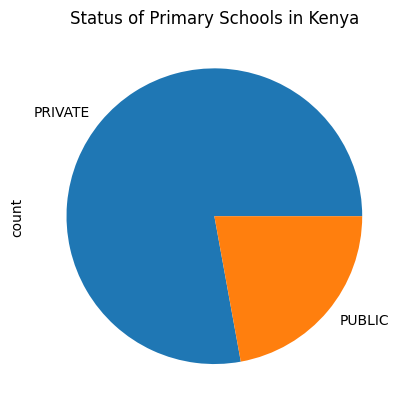

In [26]:
df['status'].value_counts().plot(kind='pie', title='Status of Primary Schools in Kenya')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PRIVATE INDIVIDUAL'),
  Text(1, 0, 'RELIGIOUS ORGANIZATION'),
  Text(2, 0, 'LOCAL GOVERNMENT AUTHORITY'),
  Text(3, 0, 'COMMUNITY'),
  Text(4, 0, 'NGO/CBO'),
  Text(5, 0, 'CENTRAL GOVERNMENT/DEB')])

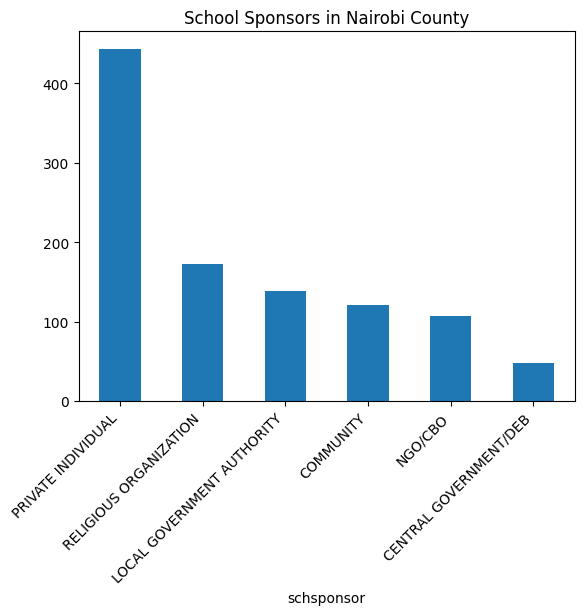

In [27]:
df['schsponsor'].value_counts().plot(kind='bar')
plt.title('School Sponsors in Nairobi County')
plt.xticks(rotation=45, ha='right')

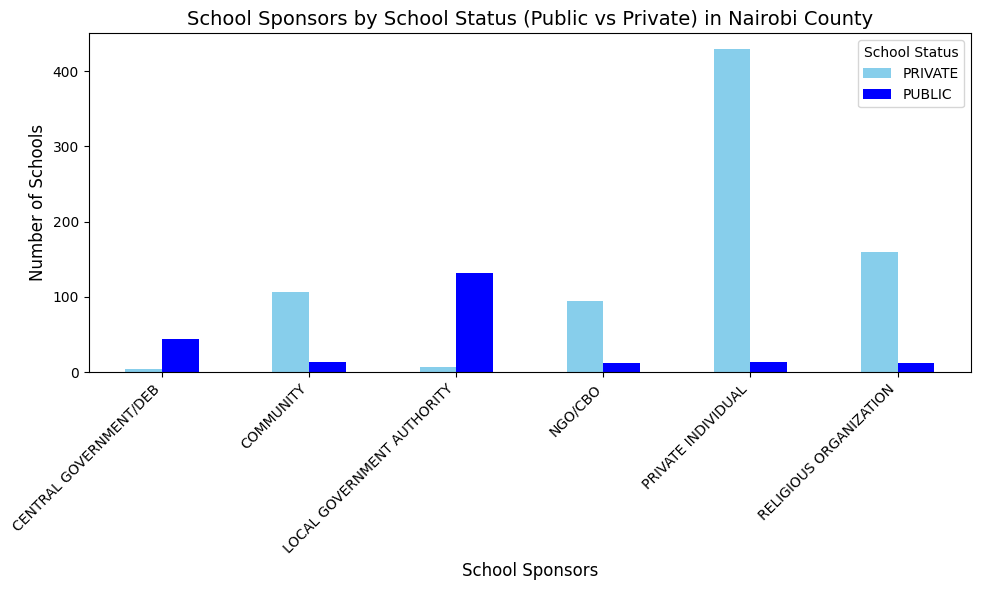

In [28]:
# Create a grouped DataFrame
grouped_data = df.groupby(['schsponsor', 'status']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'blue'])

# Customize the chart
plt.title('School Sponsors by School Status (Public vs Private) in Nairobi County', fontsize=14)
plt.xlabel('School Sponsors', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='School Status', fontsize=10)
plt.tight_layout()

In [29]:
df['type2'].value_counts()

type2
DAY ONLY           949
DAY & BOARDING      48
BOARDING ONLY       26
                     5
DAY& BOARDING        1
DAY 7& BOARDING      1
Name: count, dtype: int64

In [30]:
# Create a dictionary for mapping values
type2_mapping = {
    'DAY ONLY': 'Day Only',
    '5': 'Day Only',
    'DAY & BOARDING': 'Day and Boarding',
    'DAY& BOARDING': 'Day and Boarding',
    'DAY 7& BOARDING': 'Day and Boarding',
    'BOARDING ONLY': 'Boarding Only'
}

# Map the values using the dictionary
df['type2'] = df['type2'].map(type2_mapping)


Text(0.5, 1.0, 'Day and Boarding Distribution of Primary Schools in Nairobi')

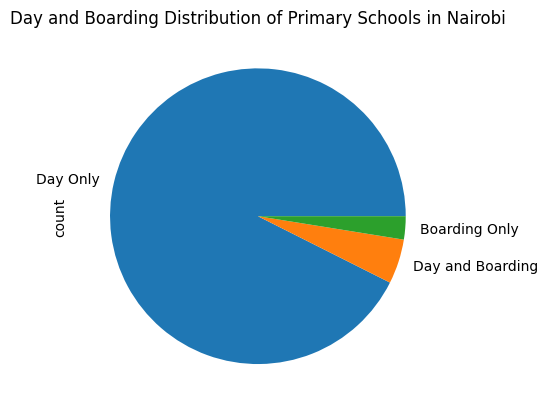

In [31]:
df['type2'].value_counts().plot(kind='pie')
plt.title('Day and Boarding Distribution of Primary Schools in Nairobi')

Text(0.5, 1.0, 'Gender Distribution of Primary Schools in Kenya')

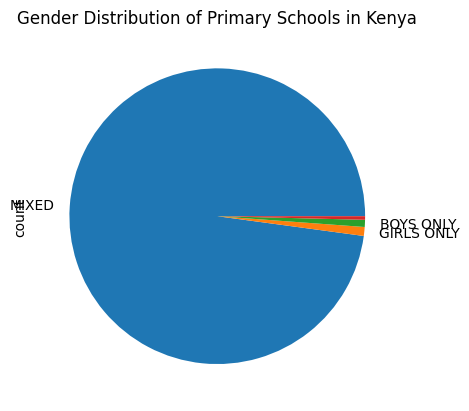

In [32]:
df['type1'].value_counts().plot(kind='pie')
plt.title('Gender Distribution of Primary Schools in Kenya')

Text(0.5, 1.0, 'Type of School')

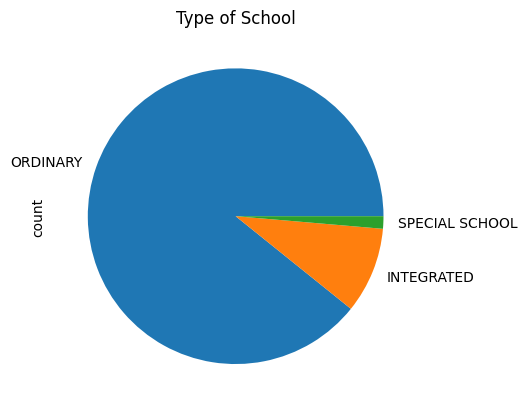

In [33]:
df['type3'].value_counts().plot(kind='pie')
plt.title('Type of School')

<h2> Infrastructure and Resource Allocation </h2>

In [34]:
# Calculate Additional Metrics
df['student_teacher_ratio'] = df['total_enrollment'] / df['teachersto']
df['classroom_student_ratio'] = df['total_enrollment'] / df['classrooms']
df['toilet_student_ratio'] = df['total_enrollment'] / df['total_toilets']

In [35]:
df.replace([np.inf, -np.inf], 0, inplace=True)

For this specific analysis, according to the Kenyan Laws for Education:
- Student-teacher ratio threshold is 40. 1 teacher is to serve a maximum of 40 students.
- Classroom-student ratio threshold is 40. 1 classroom is supposed to have a maximum of 40 students.
- Student-toilet ratio threshold id 25. 1 toilet in a school is supposed to be used a maximum of 25 students.

In [35]:
# Analysis and Insights
# 1. Schools with High Student-Teacher Ratios
high_teacher_ratio = df[df['student_teacher_ratio'] > 40]
print(f"Number of schools with high student-teacher ratios: {len(high_teacher_ratio)}")

Number of schools with high student-teacher ratios: 828


In [36]:
# 2. Schools with Overcrowded Classrooms
overcrowded_classrooms = df[df['classroom_student_ratio'] > 40]
print(f"Number of schools with overcrowded classrooms: {len(overcrowded_classrooms)}")

Number of schools with overcrowded classrooms: 193


In [37]:
# 3. Schools with Poor Sanitation
poor_sanitation = df[df['toilet_student_ratio'] > 25]
print(f"Number of schools with poor sanitation facilities: {len(poor_sanitation)}")

Number of schools with poor sanitation facilities: 562


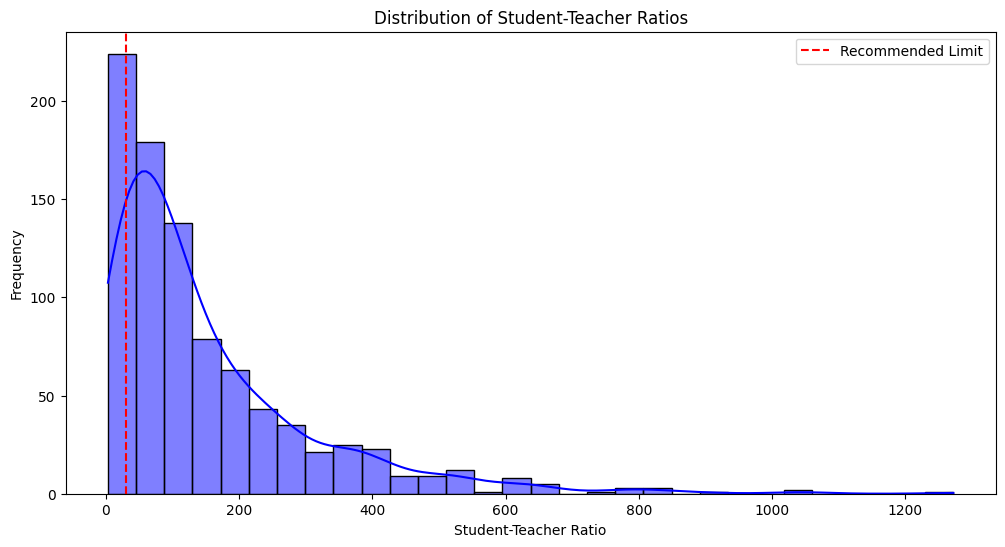

In [38]:
# Visualization: Distribution of Ratios
plt.figure(figsize=(12, 6))
sns.histplot(df['student_teacher_ratio'], kde=True, bins=30, color='blue')
plt.title('Distribution of Student-Teacher Ratios')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.axvline(30, color='red', linestyle='--', label='Recommended Limit')
plt.legend()
plt.show()

In [39]:
# Identify Schools with Infrastructure Needs
inadequate_infrastructure = df[
    (df['student_teacher_ratio'] > 40) |
    (df['classroom_student_ratio'] > 40) |
    (df['toilet_student_ratio'] > 25)
]

In [40]:
# Count Schools by Type of Infrastructure Need
infra_summary = {"Total Schools with Any Need": len(inadequate_infrastructure)}
print("Summary of Schools with Infrastructure Needs:", infra_summary)

Summary of Schools with Infrastructure Needs: {'Total Schools with Any Need': 836}


In [41]:
# Prioritize Investments
priority_areas = inadequate_infrastructure.groupby('district')[['student_teacher_ratio', 'classroom_student_ratio', 'toilet_student_ratio']].mean()
priority_areas.sort_values(by=['student_teacher_ratio', 'classroom_student_ratio', 'toilet_student_ratio'], ascending=False, inplace=True)

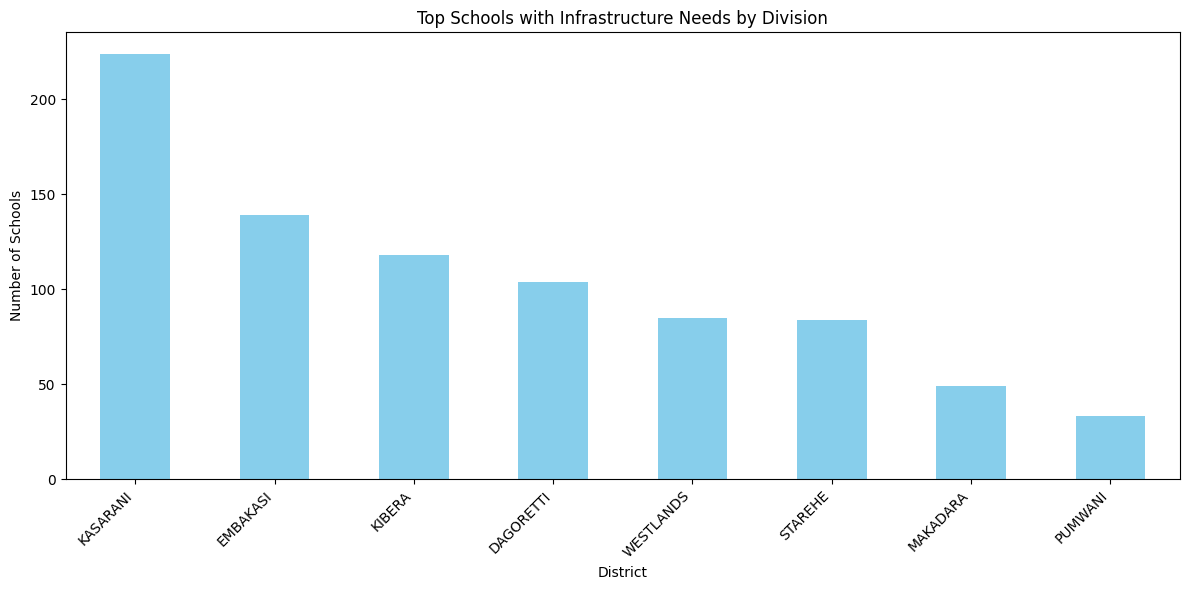

In [42]:
# Visualization: Bar Chart of Infrastructure Needs by Division
division_needs = inadequate_infrastructure['division'].value_counts()
plt.figure(figsize=(12, 6))
division_needs.plot(kind='bar', color='skyblue')
plt.title('Top Schools with Infrastructure Needs by Division')
plt.xlabel('District')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

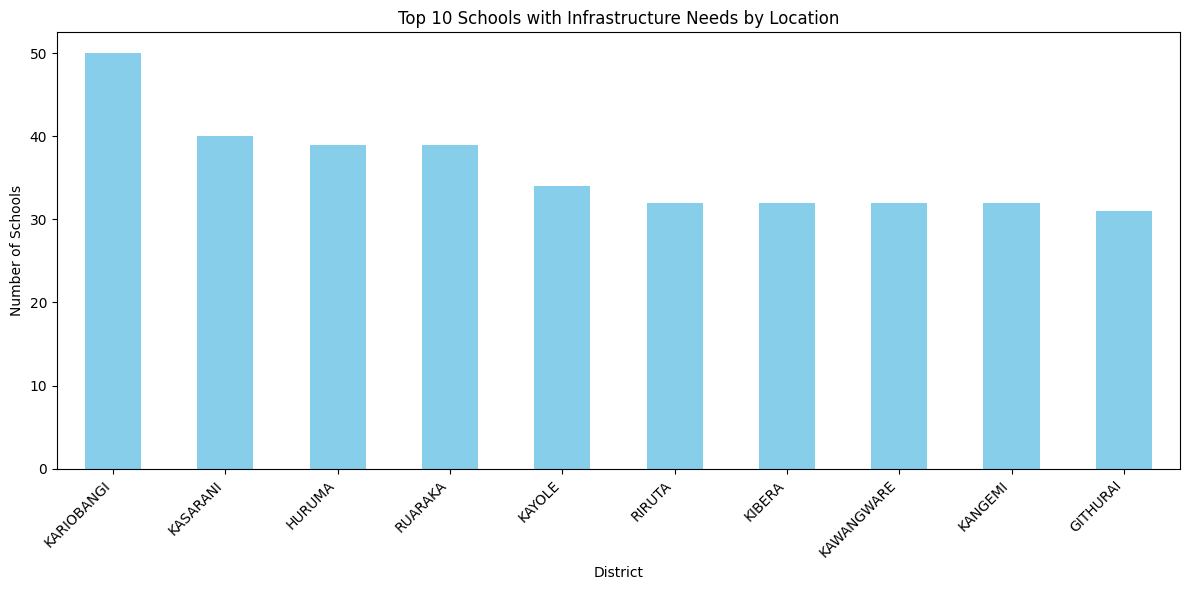

In [43]:
# Visualization: Bar Chart of Infrastructure Needs by Division
location_needs = inadequate_infrastructure['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
location_needs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Schools with Infrastructure Needs by Location')
plt.xlabel('District')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

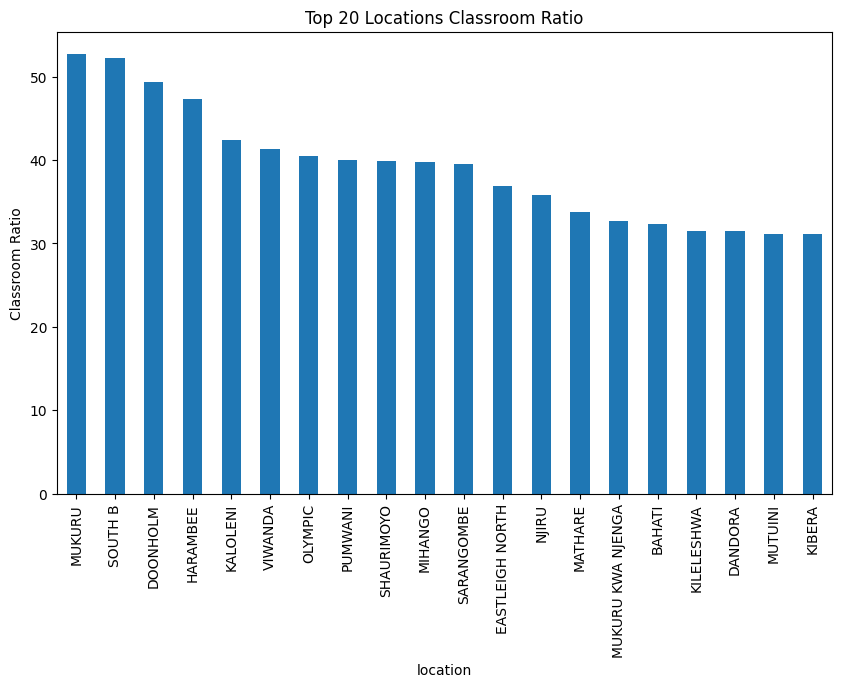

In [81]:
#Grouping by location and calculating the average
avg_grouped=df.groupby('location')['classroom_student_ratio'].mean()

#Top 20 locations
top_20_locations=avg_grouped.sort_values(ascending=False).head(20)

#Plotting the barchart
ax= top_20_locations.plot(kind='bar', figsize=(10,6))

ax.set_title('Top 20 Locations Classroom Ratio')
ax.set_xlabel('location')
ax.set_ylabel('Classroom Ratio')


plt.show()

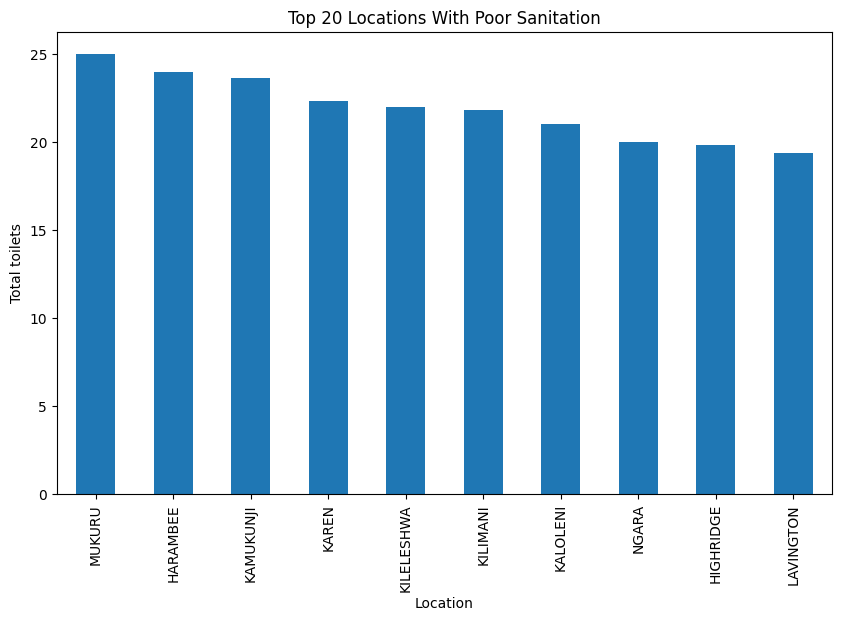

In [80]:
#Grouping by location and calculating the average sanitatiom
avg_grouped=df.groupby('location')['total_toilets'].mean()

#Top 20 locations
top_20_locations=avg_grouped.sort_values(ascending=False).head(10)

#Plotting the barchart
ax= top_20_locations.plot(kind='bar', figsize=(10,6))

ax.set_title('Top 20 Locations With Poor Sanitation')
ax.set_xlabel('Location')
ax.set_ylabel('Total toilets')


plt.show()

<h2> Student-Teacher Ratio Analysis </h2>

In [44]:
# Identify Areas with High Student-Teacher Ratios
high_ratio_schools = df[df['student_teacher_ratio'] > 40]

In [45]:
# Group by Division and Calculate Mean Ratios
division_ratios = high_ratio_schools.groupby('division')['student_teacher_ratio'].mean().sort_values(ascending=False)

In [46]:
# Group by Constituency and Calculate Mean Ratios
constituency_ratios = high_ratio_schools.groupby('costituenc')['student_teacher_ratio'].mean().sort_values(ascending=False)

In [47]:
# Recommend Teacher Recruitment
# Calculate the additional teachers needed to meet the threshold
high_ratio_schools['additional_teachers_needed'] = (
    high_ratio_schools['total_enrollment'] / 40
).round() - high_ratio_schools['teachersto']

In [48]:
# Summarize Teachers Needed by Division
recruitment_recommendations = high_ratio_schools.groupby('division')['additional_teachers_needed'].sum()

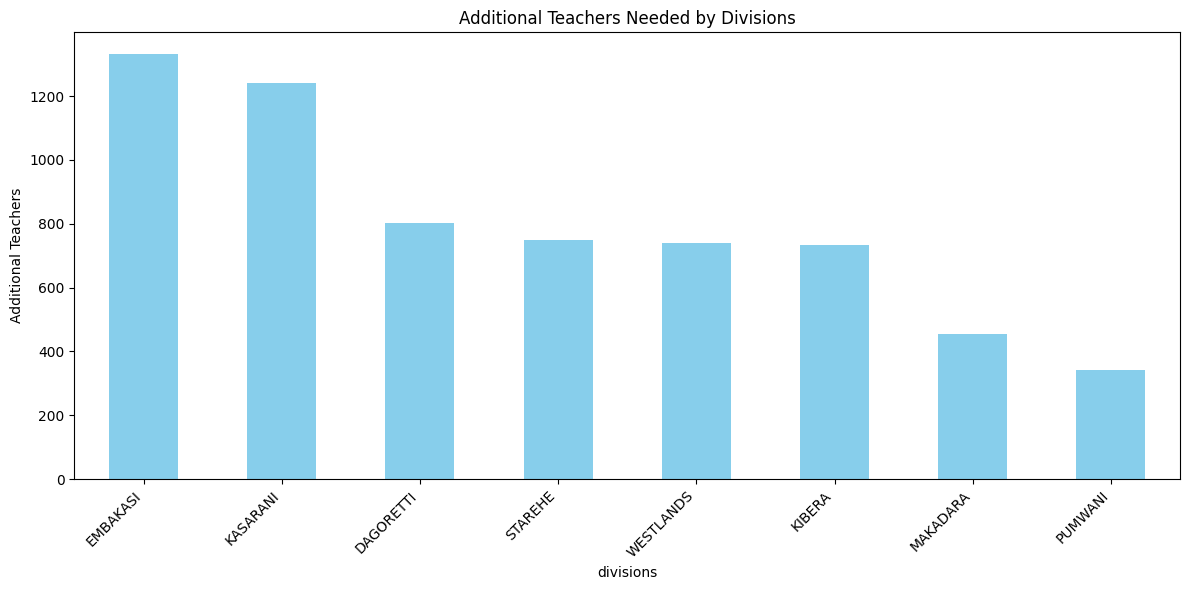

In [49]:
# Visualization: Additional Teachers Needed
plt.figure(figsize=(12, 6))
recruitment_recommendations.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Additional Teachers Needed by Divisions')
plt.xlabel('divisions')
plt.ylabel('Additional Teachers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
# Summarize Teachers Needed by District
recruitment_recommendations = high_ratio_schools.groupby('location')['additional_teachers_needed'].sum()

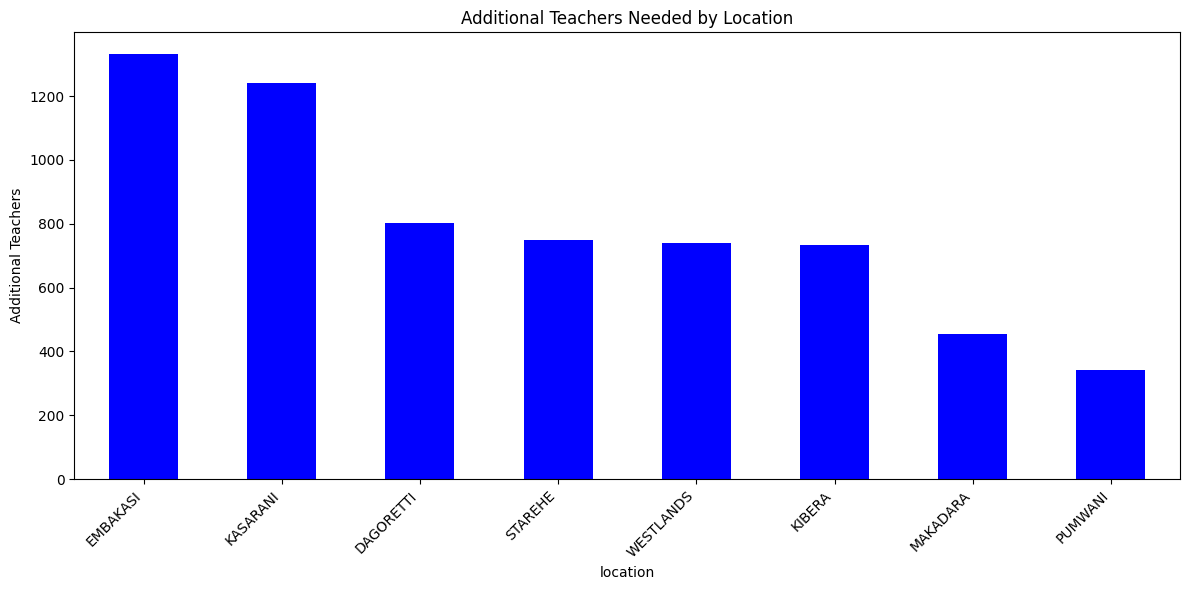

In [50]:
# Visualization: Additional Teachers Needed
plt.figure(figsize=(12, 6))
recruitment_recommendations.sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.title('Additional Teachers Needed by Location')
plt.xlabel('location')
plt.ylabel('Additional Teachers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2> Identification of Issues </h2>

In [51]:
# Identify schools with overcrowding or low teacher ratios
inadequate_schools = df[
    (df['classroom_student_ratio'] > 40) |
    (df['student_teacher_ratio'] > 40)
]

# Group by Division to identify areas with the most inadequate facilities
inadequate_by_division = inadequate_schools.groupby('division').size().reset_index(name='Inadequate School Count')

# Sort for better visualization
inadequate_by_division = inadequate_by_division.sort_values(by='Inadequate School Count', ascending=False)

# **List of Schools Requiring Urgent Attention**
urgent_attention = inadequate_schools[
    (df['classroom_student_ratio'] > 40 + 10) |  # Significantly overcrowded classrooms
    (df['student_teacher_ratio'] > 40 + 10)  # Severely low teacher-student ratio
]
print("Schools requiring urgent attention:\n", urgent_attention[['school_name', 'division', 'classroom_student_ratio', 'student_teacher_ratio']])


Schools requiring urgent attention:
                       school_name   division  classroom_student_ratio  \
20270              GATINA PRI SCH  DAGORETTI                50.235294   
20287     MWANGAZA UNITED PRIMARY  DAGORETTI                50.000000   
20293       SIFA CHILDRENS CENTRE  DAGORETTI                32.750000   
20300    WORLD HOPE ACADEMY (PRI)  DAGORETTI                34.125000   
20306    GREENWOODS ACADEMY (PRI)  DAGORETTI                29.733333   
...                           ...        ...                      ...   
22983         BEADOM SCHOOL - PRI   KASARANI                14.000000   
22985    PROVIDENCE ACADEMY - PRI   KASARANI                24.375000   
22990  CATHOLIC PAROCHIAL PRI SCH    STAREHE                42.000000   
22992          MOI AVENUE PRI SCH    STAREHE                30.083333   
22994           S.S.D PRIMARY SCH    STAREHE                19.000000   

       student_teacher_ratio  
20270             142.333333  
20287             400.00

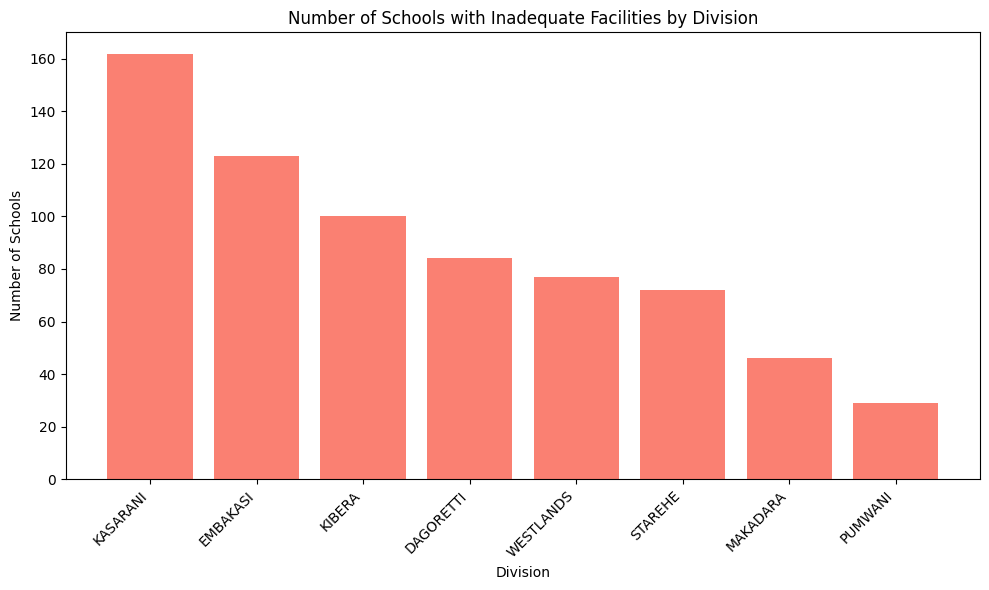

In [80]:
# **Visualization: Overcrowding Issues by Division**
plt.figure(figsize=(10, 6))
plt.bar(inadequate_by_division['division'], inadequate_by_division['Inadequate School Count'], color='salmon')
plt.title('Number of Schools with Inadequate Facilities by Division')
plt.xlabel('Division')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2> Total Enrollment by Constituency </h2>

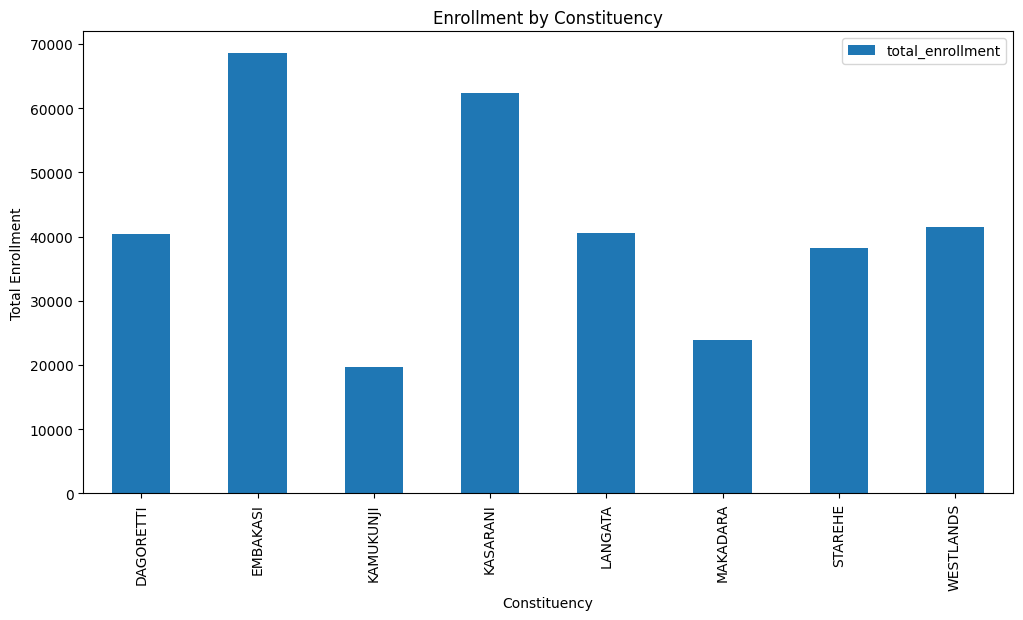

In [54]:
# Analyze regional disparities
region_access = df.groupby('costituenc')['total_enrollment'].sum().reset_index()

# Visualization
region_access.plot(x='costituenc', y='total_enrollment', kind='bar', figsize=(12, 6))
plt.title("Enrollment by Constituency")
plt.xlabel("Constituency")
plt.ylabel("Total Enrollment")
plt.show()


<h2> Gender Equality in Education </h2>

In [64]:
# Calculate gender ratio
df['Gender_Ratio'] = df['total_girls'] / df['total_boys']

# Identify schools with low gender ratios
low_gender_balance = df[(df['Gender_Ratio'] < 0.9) | (df['Gender_Ratio'] > 1.1)]
print(f"Schools with significant gender imbalances: {low_gender_balance.shape[0]}")




Schools with significant gender imbalances: 362


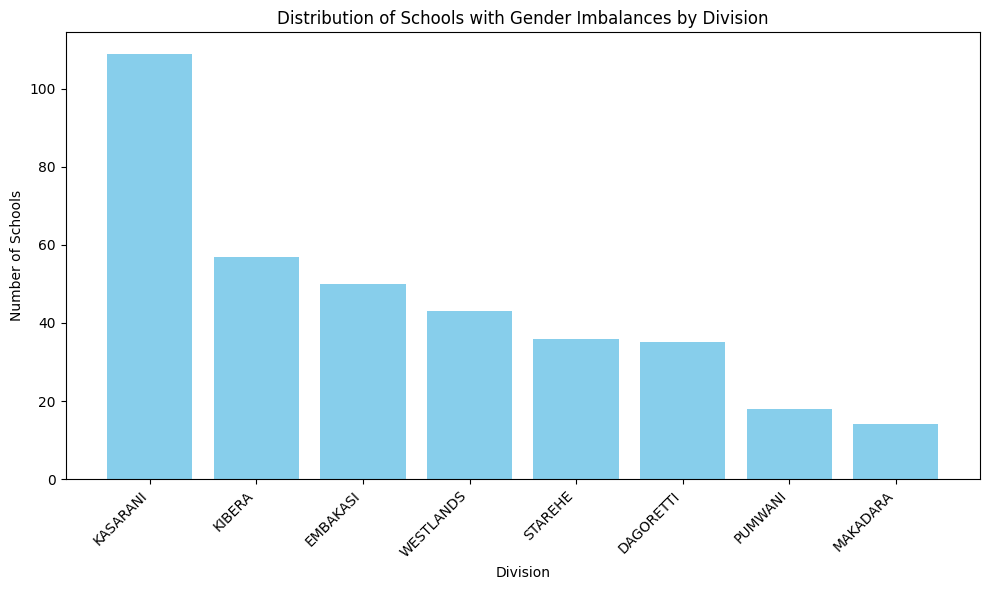

In [62]:
# Filter schools with significant gender imbalances
low_gender_balance = df[(df['Gender_Ratio'] < 0.9) | (df['Gender_Ratio'] > 1.1)]

# Group by Division
gender_imbalance_by_division = low_gender_balance.groupby('division').size().reset_index(name='School Count')

# Sort for better visualization
gender_imbalance_by_division = gender_imbalance_by_division.sort_values(by='School Count', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(gender_imbalance_by_division['division'], gender_imbalance_by_division['School Count'], color='skyblue')
plt.title('Distribution of Schools with Gender Imbalances by Division')
plt.xlabel('Division')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


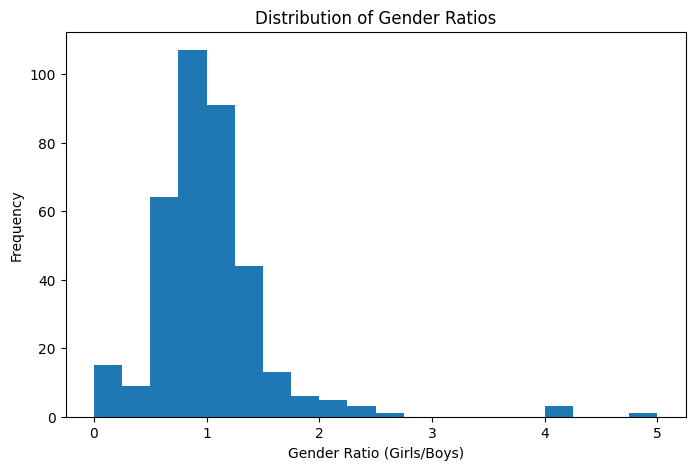

In [67]:
# Filter schools with significant gender imbalances
low_gender_balance = df[(df['Gender_Ratio'] < 0.9) | (df['Gender_Ratio'] > 1.1)]
df.replace([np.inf, -np.inf], 0, inplace=True)
# Visualization
low_gender_balance['Gender_Ratio'].plot(kind='hist', bins=20, figsize=(8, 5))
plt.title("Distribution of Gender Ratios")
plt.xlabel("Gender Ratio (Girls/Boys)")
plt.ylabel("Frequency")
plt.show()

<h2> Enrollment and Capacity Enhancement </h2>

Overcrowded schools: 304


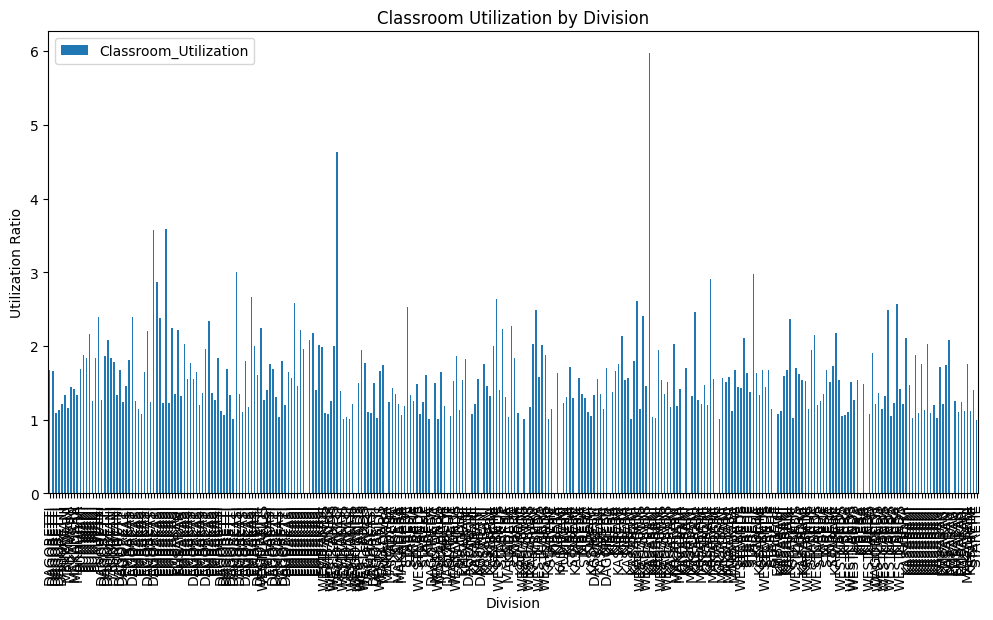

In [71]:
# Calculate capacity utilization
df['Classroom_Utilization'] = df['total_enrollment'] / (df['classrooms'] * 30)  # Assuming 30 students per class

# Identify overcrowded schools
overcrowded_schools = df[df['Classroom_Utilization'] > 1]
print(f"Overcrowded schools: {overcrowded_schools.shape[0]}")

# Visualization
overcrowded_schools.plot(
    x='division', y='Classroom_Utilization', kind='bar', figsize=(12, 6))
plt.title("Classroom Utilization by Division")
plt.xlabel("Division")
plt.ylabel("Utilization Ratio")
plt.show()

<h2> Sponsor and Status Analysis </h2>

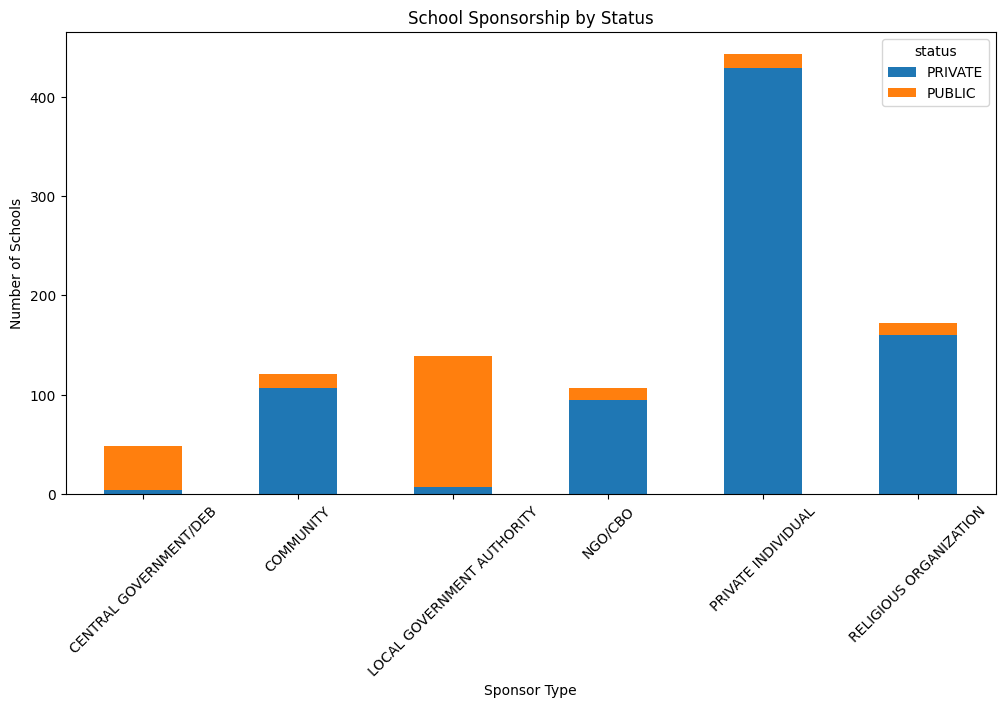

In [56]:
# Analyze school sponsors
sponsor_status = df.groupby(['schsponsor', 'status']).size().unstack(fill_value=0)

# Visualization
sponsor_status.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("School Sponsorship by Status")
plt.xlabel("Sponsor Type")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.show()


<h2> Accessiibility Analysis </h2>

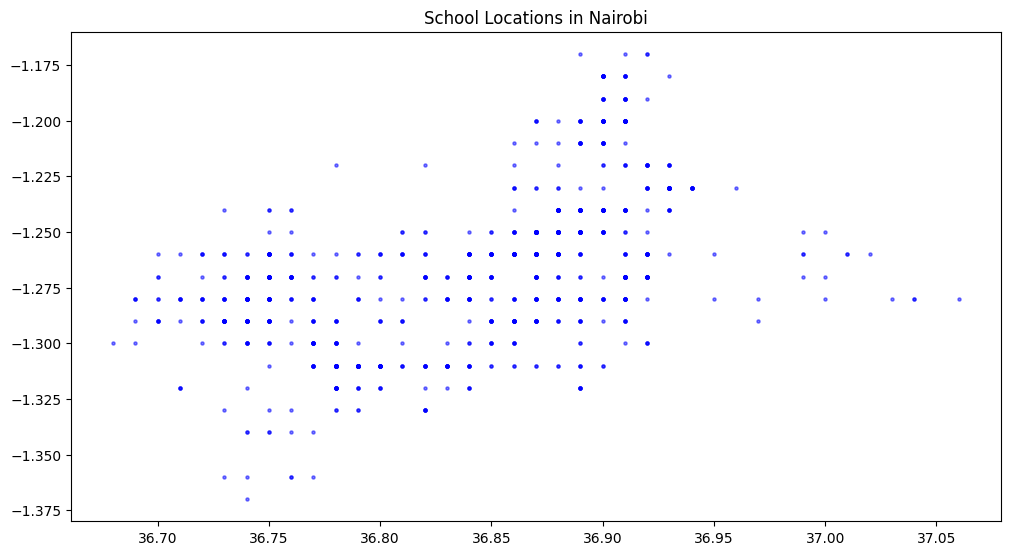

In [57]:
# Load geospatial data with GeoPandas
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

# Map schools
gdf.plot(markersize=5, figsize=(12, 8), color='blue', alpha=0.5)
plt.title("School Locations in Nairobi")
plt.show()


<h2> Impact of Sanitation on Attendance </h2>

                      toilet_student_ratio  total_enrollment
toilet_student_ratio              1.000000          0.374897
total_enrollment                  0.374897          1.000000


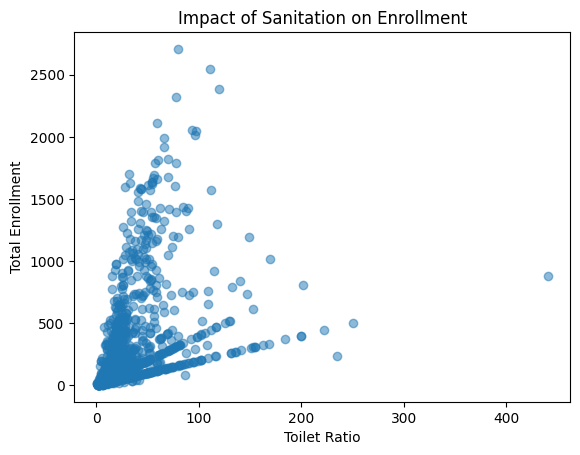

In [58]:
# Analyze sanitation and enrollment
sanitation_impact = df[['toilet_student_ratio', 'total_enrollment']].corr()
print(sanitation_impact)

# Visualization
plt.scatter(df['toilet_student_ratio'], df['total_enrollment'], alpha=0.5)
plt.title("Impact of Sanitation on Enrollment")
plt.xlabel("Toilet Ratio")
plt.ylabel("Total Enrollment")
plt.show()


<h2> Resource Allocation Efficency </h2>

In [59]:
# Benchmark key ratios
df['Efficiency_Score'] = (df['total_enrollment'] / df['classrooms']) + (df['total_enrollment'] / df['teachersto'])

# Identify schools with low efficiency
low_efficiency = df[df['Efficiency_Score'] > 50]  # Adjust threshold based on distribution
print(f"Schools with low efficiency: {low_efficiency.shape[0]}")

Schools with low efficiency: 838
